In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from scipy.optimize import curve_fit

In [3]:
df = pd.read_excel("Mexico_GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [4]:
df.describe()

,Periodo,GDP
count,62.000000,6.200000e+01
mean,1990.500000,4.866155e+11
std,18.041619,4.544804e+11
min,1960.000000,1.304000e+10
25%,1975.250000,8.336062e+10
50%,1990.500000,2.885511e+11
75%,2005.750000,8.944031e+11
max,2021.000000,1.315351e+12


array([[<Axes: title={'center': 'Periodo'}>,
        <Axes: title={'center': 'GDP'}>]], dtype=object)

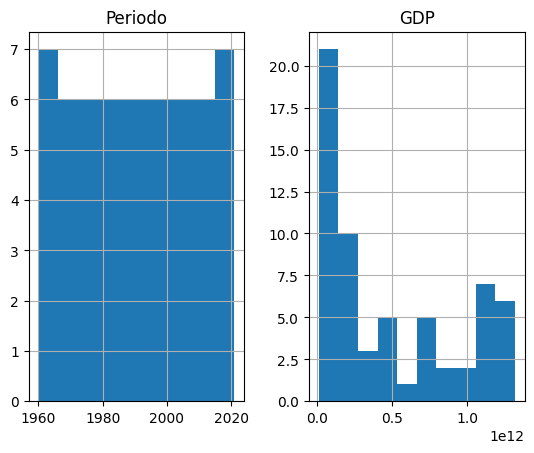

In [5]:
df.hist()

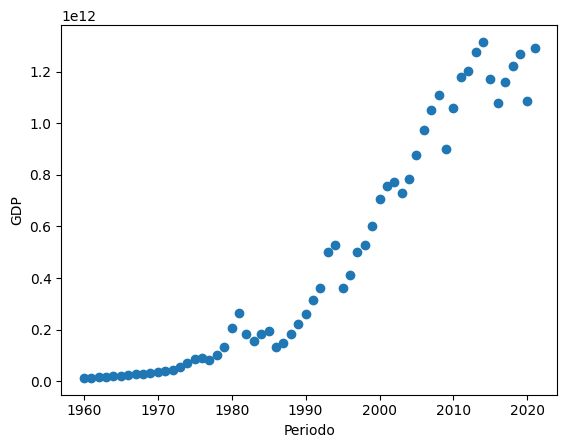

In [6]:
plt.scatter(df.Periodo, df.GDP)
plt.xlabel("Periodo")
plt.ylabel("GDP")
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True, False, False,  True,  True])

In [8]:
train = df[msk]
resultado = pd.concat([train.head(5), train.tail(5)])
resultado

,Periodo,GDP
0,1960,1.304000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
5,1965,2.184000e+10
6,1966,2.432000e+10
53,2013,1.274443e+12
54,2014,1.315351e+12
57,2017,1.158913e+12
60,2020,1.087118e+12
61,2021,1.293038e+12


In [9]:
test= df[~msk]
test

,Periodo,GDP
1,1961,1.416000e+10
4,1964,2.008000e+10
16,1976,8.902597e+10
19,1979,1.345614e+11
21,1981,2.639593e+11
22,1982,1.846092e+11
23,1983,1.561592e+11
40,2000,7.079067e+11
52,2012,1.201090e+12
55,2015,1.171868e+12


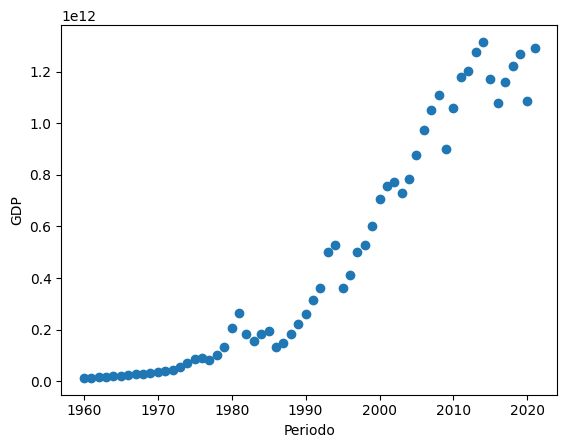

In [10]:
plt.scatter(df.Periodo, df.GDP)
plt.xlabel("Periodo")
plt.ylabel("GDP")
plt.show()

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Periodo']])
train_y = np.asanyarray(train[['GDP']])
regr.fit (train_x, train_y)

LinearRegression()

Text(0, 0.5, 'GDP')

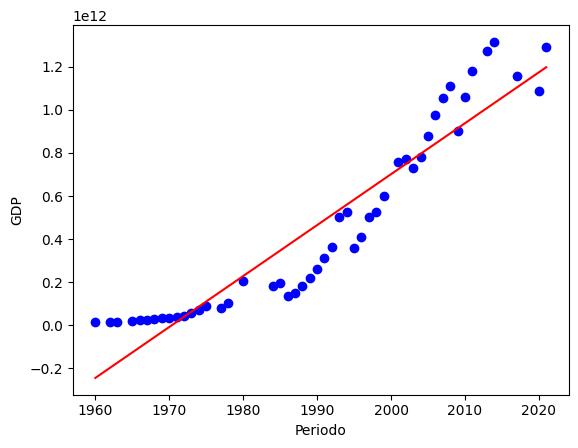

In [12]:
plt.scatter(train.Periodo, train.GDP,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Periodo")
plt.ylabel("GDP")

In [13]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Periodo']])
test_y = np.asanyarray(test[['GDP']])
test_y_hat = regr.predict(test_x)

In [14]:
test_y_hat

array([[-2.20960940e+11],
       [-1.50021274e+11],
       [ 1.33737391e+11],
       [ 2.04677057e+11],
       [ 2.51970167e+11],
       [ 2.75616723e+11],
       [ 2.99263278e+11],
       [ 7.01254719e+11],
       [ 9.85013383e+11],
       [ 1.05595305e+12],
       [ 1.07959960e+12],
       [ 1.12689272e+12],
       [ 1.15053927e+12]])

In [15]:
test_y

array([[1.41600000e+10],
       [2.00800000e+10],
       [8.90259740e+10],
       [1.34561404e+11],
       [2.63959337e+11],
       [1.84609158e+11],
       [1.56159199e+11],
       [7.07906745e+11],
       [1.20108999e+12],
       [1.17186761e+12],
       [1.07849065e+12],
       [1.22240820e+12],
       [1.26940428e+12]])

In [16]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))

Mean absolute error: 101560210162.14


In [17]:
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))

Residual sum of squares (MSE): 15650720828999000391680.00


In [18]:
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

R2-score: 0.93


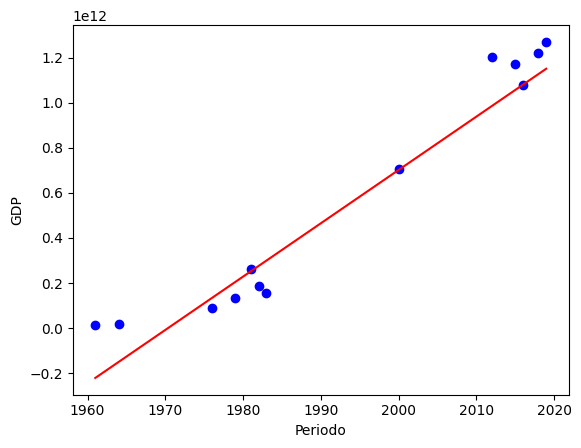

In [19]:
plt.scatter(test.Periodo, test.GDP,  color='blue')
plt.plot(test_x, regr.coef_[0][0]*test_x + regr.intercept_[0], '-r')
plt.xlabel("Periodo")
plt.ylabel("GDP")
plt.show()